<a href="https://colab.research.google.com/github/Tina-Mulu/Mchezopesa-football-predictionds/blob/main/MORINGA_SCHOOL_DS_COREWEEK_6_INDEPENDENT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Defining the question


a) Specifying the Question

As a data scientist you have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to come up with a prediction result of a game between team 1 and team 2, based on who's home and who's away , and on whether or not the game is friendly including erank in your training.


b) Defining the Metrics for success

c) Understanding the context

d) Recording the Experimental design

e) Data relevance

2. Reading the Data

In [20]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df1 = pd.read_csv("fifa_ranking.csv")
df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [22]:
#df.rename(columns = {'$b':'B'}, inplace = True)
df1.rename(columns= {'country_full':'country'}, inplace=True)

In [23]:
# dropping unnecessary columns
#df.drop(['A'], axis = 1)
df1.drop(['country_abrv', 'previous_points', 'total_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
          'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 'confederation'], axis = 1, inplace=True)

In [24]:
df1

,rank,country,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08
...,...,...,...
57788,206,Anguilla,2018-06-07
57789,206,Bahamas,2018-06-07
57790,206,Eritrea,2018-06-07
57791,206,Somalia,2018-06-07


In [25]:
df1['rank_date'] =  pd.to_datetime(df1['rank_date'])

In [26]:
# stripping the month and year from the rank date
df1['rank_month'] = df1['rank_date'].dt.month
df1['rank_year'] = df1['rank_date'].dt.year

In [27]:
df1.drop(['rank_date'], axis=1, inplace=True)
df1

,rank,country,rank_month,rank_year
0,1,Germany,8,1993
1,2,Italy,8,1993
2,3,Switzerland,8,1993
3,4,Sweden,8,1993
4,5,Argentina,8,1993
...,...,...,...,...
57788,206,Anguilla,6,2018
57789,206,Bahamas,6,2018
57790,206,Eritrea,6,2018
57791,206,Somalia,6,2018


In [28]:
df2 = pd.read_csv("results.csv")
df2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [29]:
df2.drop(['city', 'neutral'], axis= 1, inplace=True)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   country     40839 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


In [31]:
df2['date'] =  pd.to_datetime(df2['date'])

In [32]:
# stripping the month and year from the rank date
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

In [33]:
df2.drop(['date'], axis=1, inplace=True)
df2
 

,home_team,away_team,home_score,away_score,tournament,country,month,year
0,Scotland,England,0,0,Friendly,Scotland,11,1872
1,England,Scotland,4,2,Friendly,England,3,1873
2,Scotland,England,2,1,Friendly,Scotland,3,1874
3,England,Scotland,2,2,Friendly,England,3,1875
4,Scotland,England,3,0,Friendly,Scotland,3,1876
...,...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,Samoa,7,2019
40835,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,7,2019
40836,Senegal,Algeria,0,1,African Cup of Nations,Egypt,7,2019
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,India,7,2019


In [34]:
df1.head()

,rank,country,rank_month,rank_year
0,1,Germany,8,1993
1,2,Italy,8,1993
2,3,Switzerland,8,1993
3,4,Sweden,8,1993
4,5,Argentina,8,1993


**Merging the datasets**

In [36]:
#merging the datasets
hometeam = pd.merge(df1, df2, how = 'inner', left_on = ['country', 'rank_month', 'rank_year'], right_on = ['home_team','month', 'year'])

In [ ]:
hometeam

,rank,country_full,rank_month,rank_year,home_team,away_team,home_score,away_score,tournament,country,month,year
0,4,Sweden,8,1993,Sweden,Switzerland,1,2,Friendly,Sweden,8,1993
1,4,Sweden,8,1993,Sweden,France,1,1,FIFA World Cup qualification,Sweden,8,1993
2,5,Argentina,8,1993,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,8,1993
3,5,Argentina,8,1993,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,8,1993
4,8,Brazil,8,1993,Brazil,Mexico,1,1,Friendly,Brazil,8,1993
...,...,...,...,...,...,...,...,...,...,...,...,...
18604,139,Botswana,6,2018,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,6,2018
18605,147,Lesotho,6,2018,Lesotho,Eswatini,1,0,COSAFA Cup,South Africa,6,2018
18606,147,Lesotho,6,2018,Lesotho,Zimbabwe,0,0,COSAFA Cup,South Africa,6,2018
18607,160,Barbados,6,2018,Barbados,Belize,0,0,Friendly,Barbados,6,2018


In [37]:
hometeam.rename(columns={'rank':'hometeam_rank'}, inplace=True)

In [38]:
hometeam.drop_duplicates(subset=['rank_month', 'rank_year', 'month', 'year'], keep='first')


,hometeam_rank,country_x,rank_month,rank_year,home_team,away_team,home_score,away_score,tournament,country_y,month,year
0,4,Sweden,8,1993,Sweden,Switzerland,1,2,Friendly,Sweden,8,1993
33,1,Brazil,9,1993,Brazil,Venezuela,4,0,FIFA World Cup qualification,Brazil,9,1993
72,3,Italy,10,1993,Italy,Scotland,3,1,FIFA World Cup qualification,Italy,10,1993
112,1,Italy,11,1993,Italy,Portugal,1,0,FIFA World Cup qualification,Italy,11,1993
148,8,Argentina,12,1993,Argentina,Germany,2,1,Friendly,United States,12,1993
...,...,...,...,...,...,...,...,...,...,...,...,...
18309,42,Morocco,2,2018,Morocco,Nigeria,4,0,African Nations Championship,Morocco,2,2018
18314,1,Germany,3,2018,Germany,Spain,1,1,Friendly,Germany,3,2018
18441,92,Trinidad and Tobago,4,2018,Trinidad and Tobago,Panama,0,1,Friendly,Trinidad and Tobago,4,2018
18445,4,Portugal,5,2018,Portugal,Tunisia,2,2,Friendly,Portugal,5,2018


In [40]:
# merging in terms of the away team
final_df = pd.merge(df1, hometeam, how='inner', left_on=['country', 'rank_month', 'rank_year'], right_on=['away_team', 'month', 'year'])
final_df

,rank,country,rank_month_x,rank_year_x,hometeam_rank,country_x,rank_month_y,rank_year_y,home_team,away_team,home_score,away_score,tournament,country_y,month,year
0,3,Switzerland,8,1993,4,Sweden,8,1993,Sweden,Switzerland,1,2,Friendly,Sweden,8,1993
1,5,Argentina,8,1993,19,Colombia,8,1993,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,8,1993
2,5,Argentina,8,1993,67,Paraguay,8,1993,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,8,1993
3,5,Argentina,8,1993,70,Peru,8,1993,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,8,1993
4,8,Brazil,8,1993,22,Uruguay,8,1993,Uruguay,Brazil,1,1,FIFA World Cup qualification,Uruguay,8,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,129,Latvia,6,2018,126,Lithuania,6,2018,Lithuania,Latvia,1,1,Friendly,Lithuania,6,2018
16953,139,Botswana,6,2018,118,Zimbabwe,6,2018,Zimbabwe,Botswana,1,1,COSAFA Cup,South Africa,6,2018
16954,155,Mauritius,6,2018,139,Botswana,6,2018,Botswana,Mauritius,6,0,COSAFA Cup,South Africa,6,2018
16955,163,Belize,6,2018,160,Barbados,6,2018,Barbados,Belize,0,0,Friendly,Barbados,6,2018


In [41]:
final_df.rename(columns={'rank':'awayteam_rank'}, inplace=True)

In [43]:
final_df.drop(['country_x', 'rank_month_x', 'rank_year_x', 'country_y', 'rank_month_y', 'rank_year_y'], axis=1, inplace=True)

In [44]:
final_df

,awayteam_rank,country,hometeam_rank,home_team,away_team,home_score,away_score,tournament,month,year
0,3,Switzerland,4,Sweden,Switzerland,1,2,Friendly,8,1993
1,5,Argentina,19,Colombia,Argentina,2,1,FIFA World Cup qualification,8,1993
2,5,Argentina,67,Paraguay,Argentina,1,3,FIFA World Cup qualification,8,1993
3,5,Argentina,70,Peru,Argentina,0,1,FIFA World Cup qualification,8,1993
4,8,Brazil,22,Uruguay,Brazil,1,1,FIFA World Cup qualification,8,1993
...,...,...,...,...,...,...,...,...,...,...
16952,129,Latvia,126,Lithuania,Latvia,1,1,Friendly,6,2018
16953,139,Botswana,118,Zimbabwe,Botswana,1,1,COSAFA Cup,6,2018
16954,155,Mauritius,139,Botswana,Mauritius,6,0,COSAFA Cup,6,2018
16955,163,Belize,160,Barbados,Belize,0,0,Friendly,6,2018


In [45]:
final_df.shape

(16957, 10)

**Checking Multicollinearity**

In [46]:
# Remove the serial and admit chance columns, we want to focus on our independent variables only.

independent_only = final_df.drop(columns=['home_team', 'away_team','tournament', 'country', 'month', 'year'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,awayteam_rank,hometeam_rank,home_score,away_score
awayteam_rank,1.000000,0.469478,0.318611,-0.180431
hometeam_rank,0.469478,1.000000,-0.135667,0.221319
home_score,0.318611,-0.135667,1.000000,-0.163527
away_score,-0.180431,0.221319,-0.163527,1.000000


Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above.

In [47]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

#Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal.
# awayteam rank  has a score of 1.75, hometeam rank has a score of 1.64, home score has a score of 1.26, etc.


,awayteam_rank,hometeam_rank,home_score,away_score
awayteam_rank,1.745730,-1.000030,-0.620780,0.434794
hometeam_rank,-1.000030,1.635728,0.464244,-0.466537
home_score,-0.620780,0.464244,1.259328,-0.008819
away_score,0.434794,-0.466537,-0.008819,1.180261


**Polynomial Regression Approach**

In [48]:
final_df.drop(['month', 'year'], axis = 1, inplace=True)
final_df

,awayteam_rank,country,hometeam_rank,home_team,away_team,home_score,away_score,tournament
0,3,Switzerland,4,Sweden,Switzerland,1,2,Friendly
1,5,Argentina,19,Colombia,Argentina,2,1,FIFA World Cup qualification
2,5,Argentina,67,Paraguay,Argentina,1,3,FIFA World Cup qualification
3,5,Argentina,70,Peru,Argentina,0,1,FIFA World Cup qualification
4,8,Brazil,22,Uruguay,Brazil,1,1,FIFA World Cup qualification
...,...,...,...,...,...,...,...,...
16952,129,Latvia,126,Lithuania,Latvia,1,1,Friendly
16953,139,Botswana,118,Zimbabwe,Botswana,1,1,COSAFA Cup
16954,155,Mauritius,139,Botswana,Mauritius,6,0,COSAFA Cup
16955,163,Belize,160,Barbados,Belize,0,0,Friendly


In [49]:
poly_reg_dataset =  final_df.groupby(['hometeam_rank']).mean()
poly_reg_dataset.head()

,awayteam_rank,home_score,away_score
hometeam_rank,,,
1,36.900000,2.381250,0.643750
2,42.974194,2.129032,0.658065
3,39.081633,2.149660,0.768707
4,43.477707,2.050955,0.732484
5,42.952381,1.964286,0.750000


In [50]:
X = poly_reg_dataset.index.values.reshape(-1,1)
y = poly_reg_dataset['home_score'].values.reshape(-1,1)

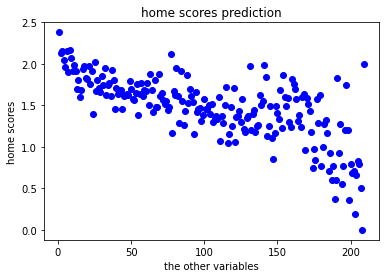

In [ ]:
plt.scatter(X, y, color='blue') 
plt.title('home scores prediction')
plt.xlabel('the other variables')
plt.ylabel('home scores')
plt.show()

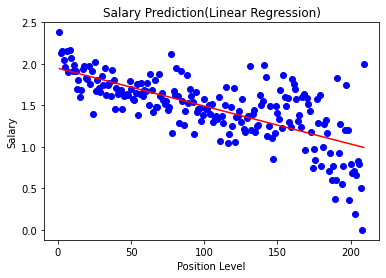

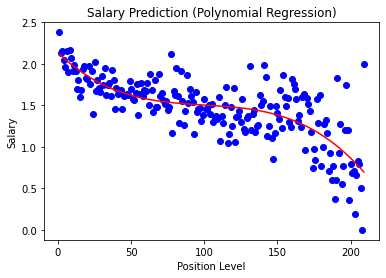

In [ ]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Salary Prediction(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 3) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# pol_reg.predict(poly_reg.fit_transform([[5.5]]))


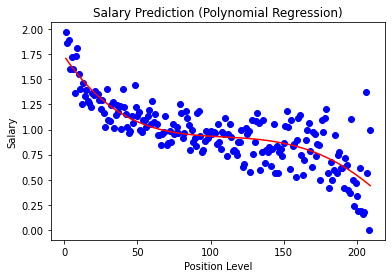

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))


Linear prediction: 1
Polynomial prediction: 2


In [ ]:
poly_reg_dataset =  final_df.groupby(['awayteam_rank']).mean()
poly_reg_dataset.head()

,hometeam_rank,home_score,away_score
awayteam_rank,,,
1,38.534591,0.880503,1.968553
2,42.816327,0.775510,1.857143
3,46.290076,0.946565,1.893130
4,43.014493,0.818841,1.601449
5,37.322835,1.141732,1.724409


In [ ]:
X = poly_reg_dataset.index.values.reshape(-1,1)
y = poly_reg_dataset['away_score'].values.reshape(-1,1)

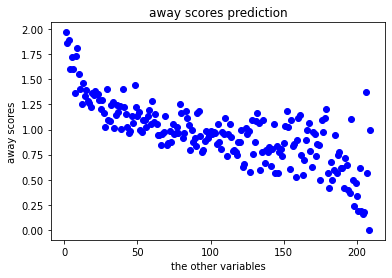

In [ ]:
plt.scatter(X, y, color='blue') 
plt.title('away scores prediction')
plt.xlabel('the other variables')
plt.ylabel('away scores')
plt.show()

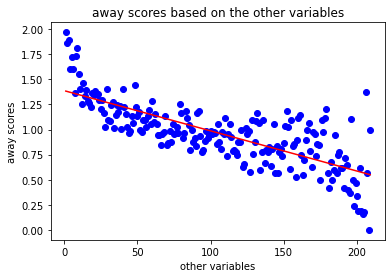

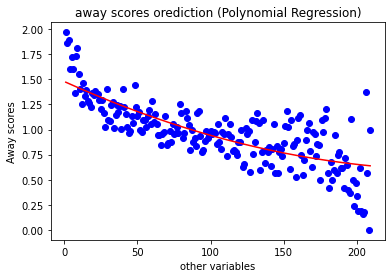

In [ ]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('away scores based on the other variables')
plt.xlabel('other variables')
plt.ylabel('away scores')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('away scores orediction (Polynomial Regression)')
plt.xlabel('other variables')
plt.ylabel('Away scores')
plt.show()

# pol_reg.predict(poly_reg.fit_transform([[5.5]]))

**Optimizing the polynomial regression model**

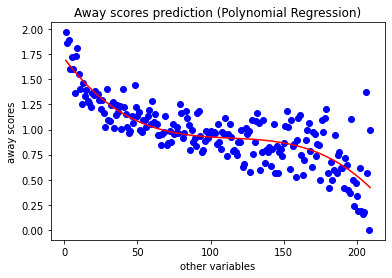

In [ ]:
 #Fit polynomial Regression to the dataset
poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly = poly_reg_3.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Away scores prediction (Polynomial Regression)')
plt.xlabel('other variables')
plt.ylabel('away scores')
plt.show()

In [ ]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_3.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Linear prediction: 1
Polynomial prediction: 1


**Logistic Regression approach**

In [51]:
# importing our libraries
import pandas as pd
import seaborn as sb

In [53]:
final_df

,awayteam_rank,country,hometeam_rank,home_team,away_team,home_score,away_score,tournament
0,3,Switzerland,4,Sweden,Switzerland,1,2,Friendly
1,5,Argentina,19,Colombia,Argentina,2,1,FIFA World Cup qualification
2,5,Argentina,67,Paraguay,Argentina,1,3,FIFA World Cup qualification
3,5,Argentina,70,Peru,Argentina,0,1,FIFA World Cup qualification
4,8,Brazil,22,Uruguay,Brazil,1,1,FIFA World Cup qualification
...,...,...,...,...,...,...,...,...
16952,129,Latvia,126,Lithuania,Latvia,1,1,Friendly
16953,139,Botswana,118,Zimbabwe,Botswana,1,1,COSAFA Cup
16954,155,Mauritius,139,Botswana,Mauritius,6,0,COSAFA Cup
16955,163,Belize,160,Barbados,Belize,0,0,Friendly


In [56]:
#First creating a list of our conditions
conditions = [
    (final_df['home_score'] > final_df['away_score']),
    (final_df['home_score'] < final_df['away_score']),
    (final_df['home_score'] == final_df['away_score']),
    ]

# create a list of the values we want to assign for each condition
values = ['Win','Lose','Draw']

# create a new column and use np.select to assign values to it using our lists as arguments
final_df['Status'] = np.select(conditions, values)
final_df

,awayteam_rank,country,hometeam_rank,home_team,away_team,home_score,away_score,tournament,Status
0,3,Switzerland,4,Sweden,Switzerland,1,2,Friendly,Lose
1,5,Argentina,19,Colombia,Argentina,2,1,FIFA World Cup qualification,Win
2,5,Argentina,67,Paraguay,Argentina,1,3,FIFA World Cup qualification,Lose
3,5,Argentina,70,Peru,Argentina,0,1,FIFA World Cup qualification,Lose
4,8,Brazil,22,Uruguay,Brazil,1,1,FIFA World Cup qualification,Draw
...,...,...,...,...,...,...,...,...,...
16952,129,Latvia,126,Lithuania,Latvia,1,1,Friendly,Draw
16953,139,Botswana,118,Zimbabwe,Botswana,1,1,COSAFA Cup,Draw
16954,155,Mauritius,139,Botswana,Mauritius,6,0,COSAFA Cup,Win
16955,163,Belize,160,Barbados,Belize,0,0,Friendly,Draw


4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

a) Validation

5. Tidying the dataset


In [ ]:
# checking for duplicates and dropping them
df3.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
10246505    False
10246506    False
10246507    False
10246508    False
10246509    False
Length: 10246510, dtype: bool

In [ ]:
df3.drop_duplicates(subset=None, keep='first', inplace=False)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-03-26,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,GER,0.00,57,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1911-10-09,Germany,Austria,1,2,Friendly,Dresden,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10246505,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-09-06,Gibraltar,North Macedonia,0,2,UEFA Nations League,Gibraltar,False
10246506,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-10-16,Gibraltar,Liechtenstein,2,1,UEFA Nations League,Gibraltar,False
10246507,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2018-11-16,Gibraltar,Armenia,2,6,UEFA Nations League,Gibraltar,False
10246508,195,Gibraltar,GIB,34.16,34,1,34.16,34.16,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2018-06-07,2019-03-23,Gibraltar,Republic of Ireland,0,1,UEFA Euro qualification,Gibraltar,False


In [ ]:
# checking for null values
df3.isnull().sum()

rank                       0
country                    0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

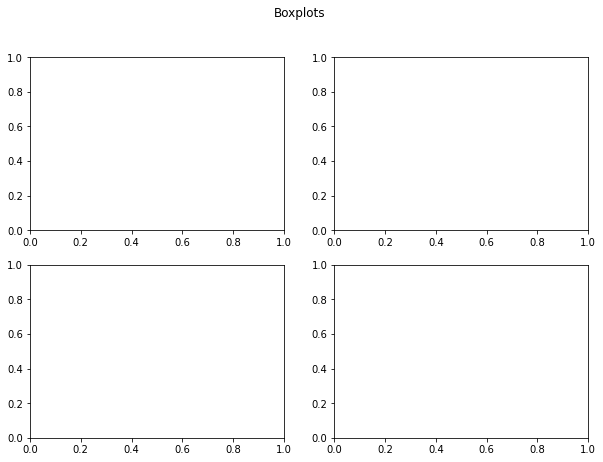

In [ ]:
# checking for outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')

sns.boxplot(df2['home_team'], ax=ax2)
sns.boxplot(df2['away_team'], ax=ax3)
sns.boxplot(df2['tournament'], ax=ax4)
plt.show()